In [ ]:
# Example taken from https://www.pyimagesearch.com/2014/07/28/a-slic-superpixel-tutorial-using-python/
# For detailed implementations, follow https://medium.com/@darshita1405/superpixels-and-slic-6b2d8a6e4f08

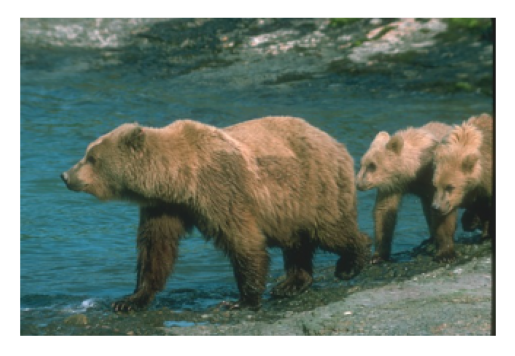

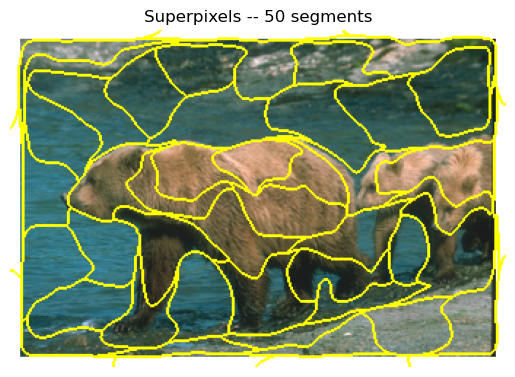

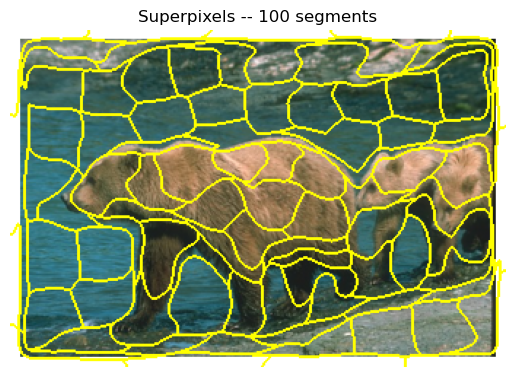

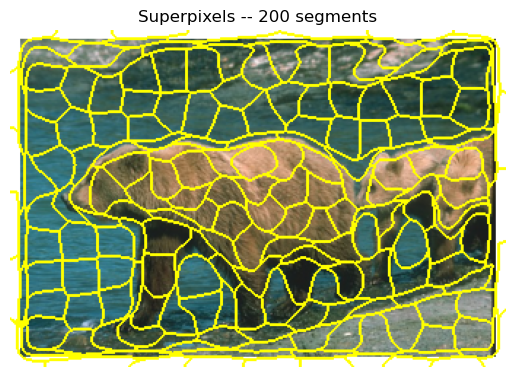

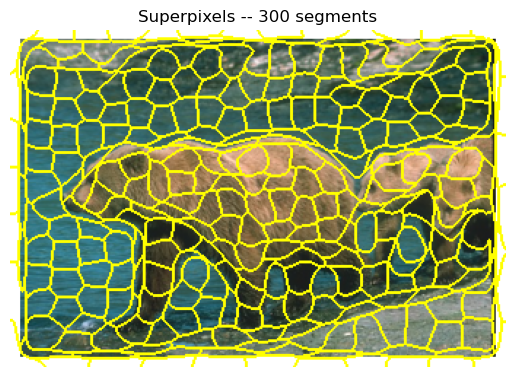

In [1]:
# import the necessary packages
from skimage.segmentation import slic # Super Linear Iterative Clusterring
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import cv2
import matplotlib.pyplot as plt

# load the image and convert it to a floating point data type
image = img_as_float( cv2.cvtColor(io.imread('100075-Bear.png'),cv2.COLOR_RGBA2RGB))
# print(image.shape)
plt.imshow(image), plt.axis("off")

# loop over the number of segments
for numSegments in (50, 100, 200, 300):
    # apply SLIC and extract (approximately) the supplied number
    # of segments
    segments = slic(image, n_segments = numSegments, sigma = 5)
    # show the output of SLIC
    fig = plt.figure("Superpixels -- %d segments" % (numSegments))
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(mark_boundaries(image, segments))
    plt.title("Superpixels -- %d segments" % (numSegments))
    plt.axis("off")

# show the plots
plt.show()

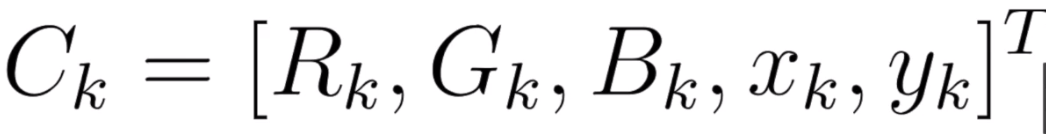

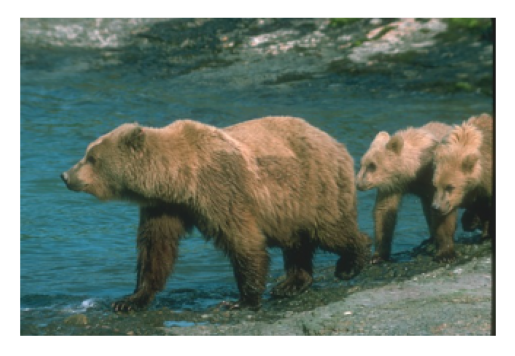

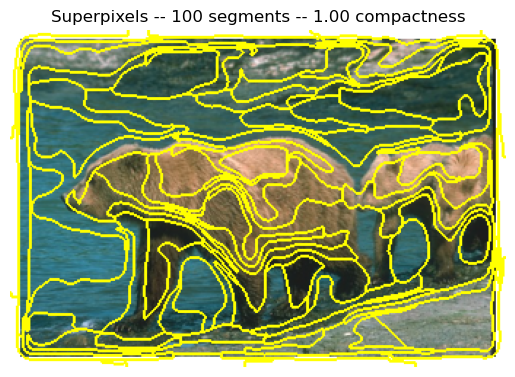

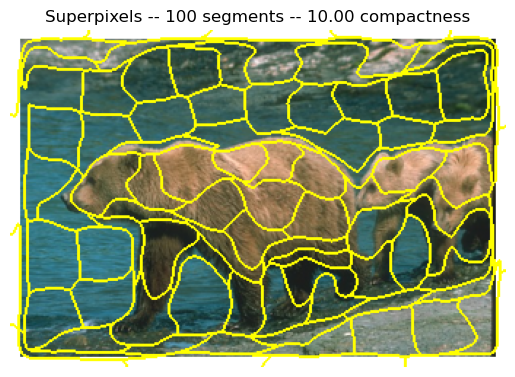

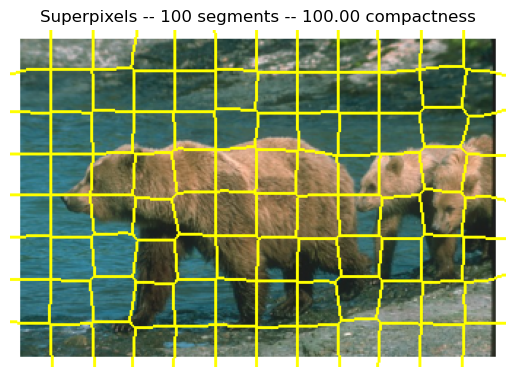

In [2]:
# Fixing the number of segments, changing the compactness
plt.imshow(image), plt.axis("off")

# compactness: Balances color proximity and space proximity. Higher values give more weight to space proximity,
# making superpixel shapes more square/cubic.

num_segments = 100
# loop over the number of segments
for compact in (1, 10, 100):  # Default value of compactness is 10
    # apply SLIC and extract (approximately) the supplied number
    # of segments
    segments = slic(image, n_segments = num_segments, compactness=compact, sigma = 5)
    # show the output of SLIC
    fig = plt.figure("Superpixels compactness --- %.2fd" % (compact))
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(mark_boundaries(image, segments))
    plt.title("Superpixels -- %d segments -- %.2f compactness" % (num_segments, compact))
    plt.axis("off")

# show the plots
plt.show()

C:\Users\leosh\AppData\Local\Temp\ipykernel_18752\2113146764.py:10: FutureWarning: `max_iter` is a deprecated argument name for `slic`. It will be removed in version 1.0. Please use `max_num_iter` instead.
  segments = slic(image, n_segments = num_segments, compactness=compact,


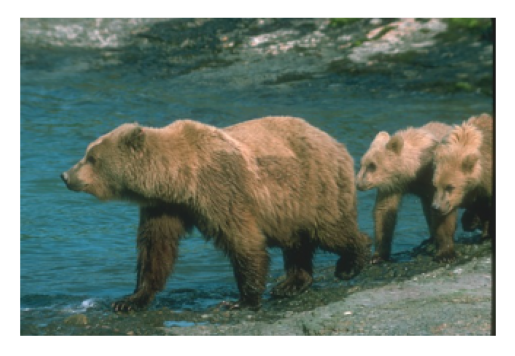

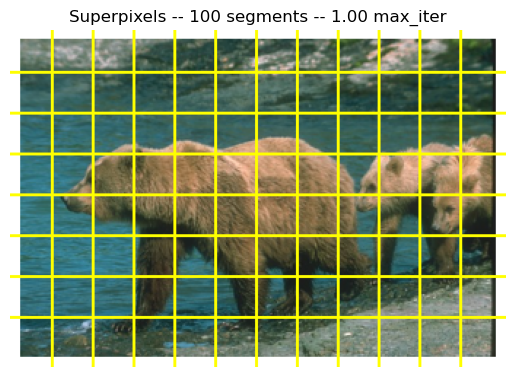

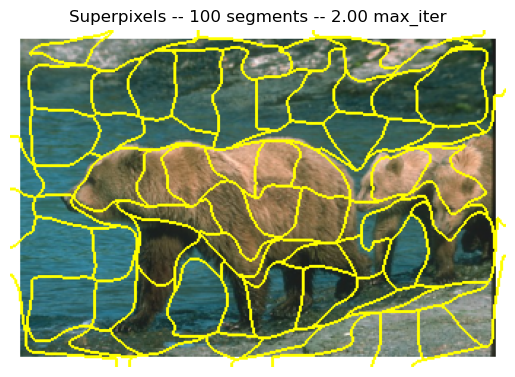

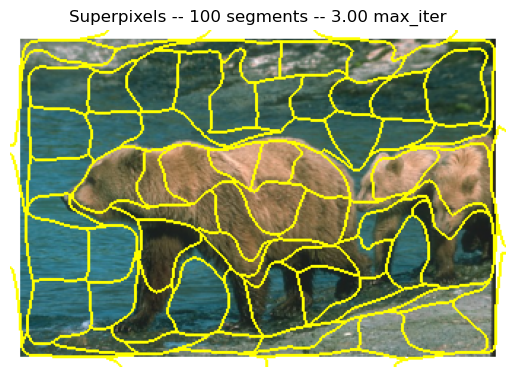

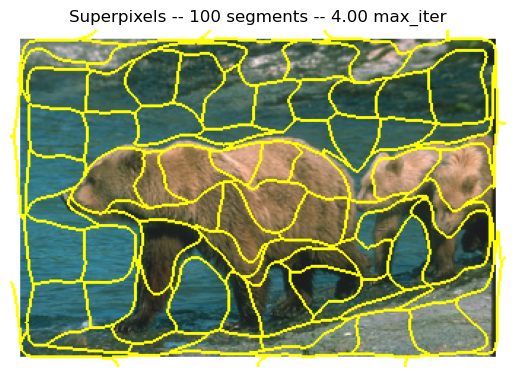

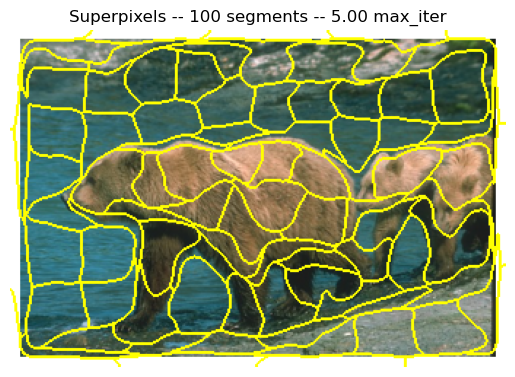

In [3]:
# Fixing the number of segments and compactness, change the maximum iterations
plt.imshow(image), plt.axis("off")

num_segments = 100
compact = 10
# loop over the number of segments
for max_i in (1, 2, 3, 4, 5):  # Default value of max_iter = 5
    # apply SLIC and extract (approximately) the supplied number
    # of segments
    segments = slic(image, n_segments = num_segments, compactness=compact,
                  max_iter=max_i, sigma = 5)
    # show the output of SLIC
    fig = plt.figure("Superpixels compactness --- %d" % (max_i))
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(mark_boundaries(image, segments))
    plt.title("Superpixels -- %d segments -- %.2f max_iter" % (num_segments, max_i))
    plt.axis("off")

# show the plots
plt.show()

Apply sklearn.cluster.KMeans to given data. Set n_clusters = 5.   
Change the way of initialization and compare the final average square distance.

In [4]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1,5], [2,2], [3,9], [4,8], [6,6], [4,3], [8,10], [9,7], [11,5], [13,4]])

In [5]:
### initialize with given centers
init_c = np.array([[4,3],[8,10],[9,7],[3,9],[4,8]])
kmeans = KMeans(n_clusters=5,init=init_c,random_state=0, n_init=1).fit(X)

print(kmeans.inertia_/len(X))

2.3


d:\Anaconda\envs\CS4243\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [6]:
#### random initialization with multiple runs.
kmeans = KMeans(n_clusters=5, random_state=0, n_init=1).fit(X)
print(kmeans.inertia_/len(X))

2.1166666666666667


d:\Anaconda\envs\CS4243\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
